# 激活函数

导入库文件

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### sigmoid

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

- 1 阶导数
    $$
    \frac{\partial \sigma}{\partial x} = \sigma(x) (1 - \sigma(x))
    $$
- 2 阶导数
    $$
    \frac{\partial^2 \sigma}{\partial x^2} = \frac{\partial \sigma}{\partial x} (1 - 2 \sigma(x))
    $$

In [2]:
import numpy as np

class Sigmoid():
    def fn(self, x):
        return 1 / (1 + np.exp(-x))

    def grad(self, x):
        fn_x = self.fn(x)
        return fn_x * (1 - fn_x)

    def grad2(self, x):
        fn_x = self.fn(x)
        return fn_x * (1 - fn_x) * (1 - 2 * fn_x)

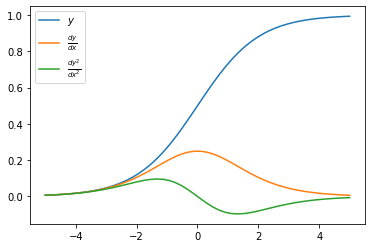

In [3]:
x = np.linspace(-5, 5, 50)
s = Sigmoid()

plt.plot(x, s.fn(x), label=r'$y$')
plt.plot(x, s.grad(x), label=r'$\frac{dy}{dx}$')
plt.plot(x, s.grad2(x), label=r'$\frac{dy^2}{dx^2}$')

plt.legend()
plt.show()

###  ReLU

$$
\text{ReLU}(x_i) = 
\begin{cases}
    &  x_i &&\text{if }x_i > 0 \\
    &  0 &&\text{otherwise}
\end{cases}
$$

- 1 阶导数
    $$
    \frac{\partial \text{ReLU}}{\partial x_i} = 
    \begin{cases}
        &  1 &&\text{if }x_i > 0 \\
        &  0 &&\text{otherwise}
    \end{cases}
    $$
- 2 阶导数
    $$
    \frac{\partial^2 \text{ReLU}}{\partial x_i^2}  =  0
    $$


In [4]:
class ReLU():
    def fn(self, x):
        return np.clip(x, 0, np.inf)

    def grad(self, x):
        return (x > 0).astype(int)

    def grad2(self, x):
        return np.zeros_like(x)

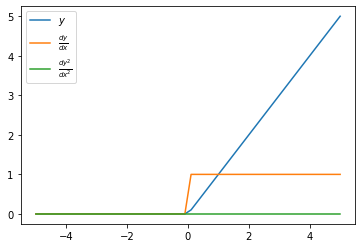

In [5]:
x = np.linspace(-5, 5, 50)
s = ReLU()

plt.plot(x, s.fn(x), label=r'$y$')
plt.plot(x, s.grad(x), label=r'$\frac{dy}{dx}$')
plt.plot(x, s.grad2(x), label=r'$\frac{dy^2}{dx^2}$')

plt.legend()
plt.show()

### LeakyReLU

$$
            \text{LeakyReLU}(x_i) = 
            \begin{cases}
                &=  x_i &&\text{if } x_i > 0 \\
                &=  \alpha x_i &&\text{otherwise}
            \end{cases}
$$

- 1 阶导数:
    $$
            \frac{\partial \text{LeakyReLU}}{\partial x_i} =
            \begin{cases}
                &=  1 &&\text{if }x_i > 0 \\
                &=  \alpha &&\text{otherwise}
            \end{cases}
    $$
- 2 阶导数:
    $$
            \frac{\partial^2 \text{LeakyReLU}}{\partial x_i^2}  =  0
    $$

In [6]:
class LeakyReLU():
    def __init__(self, alpha=0.3):
        self.alpha = alpha
    
    def fn(self, x):
        _x = x.copy()
        _x[x < 0] = _x[x < 0] * self.alpha
        return _x

    def grad(self, x):
        out = np.ones_like(x)
        out[x < 0] *= self.alpha
        return out

    def grad2(self, x):
        return np.zeros_like(x)


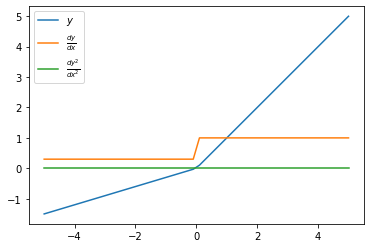

In [7]:
x = np.linspace(-5, 5, 50)
s = LeakyReLU()

plt.plot(x, s.fn(x), label=r'$y$')
plt.plot(x, s.grad(x), label=r'$\frac{dy}{dx}$')
plt.plot(x, s.grad2(x), label=r'$\frac{dy^2}{dx^2}$')

plt.legend()
plt.show()

### Tanh

$$
$$

- 1 阶导数
    $$
            \frac{\partial \tanh}{\partial x_i}  =  1 - \tanh(x)^2
    $$
- 2 阶导数
    $$
            \frac{\partial^2 \tanh}{\partial x_i^2} =
                -2 \tanh(x) \left(\frac{\partial \tanh}{\partial x_i}\right)
    $$

In [8]:
class Tanh():
    def fn(self, x):
        return np.tanh(x)

    def grad(self, x):
        return 1 - np.tanh(x) ** 2

    def grad2(self, x):
        tanh_x = np.tanh(x)
        return -2 * tanh_x * (1 - tanh_x ** 2)


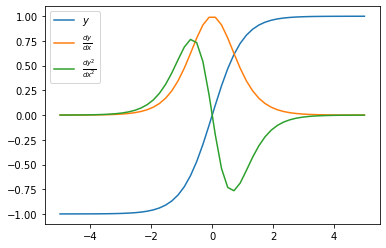

In [9]:
x = np.linspace(-5, 5, 50)
s = Tanh()

plt.plot(x, s.fn(x), label=r'$y$')
plt.plot(x, s.grad(x), label=r'$\frac{dy}{dx}$')
plt.plot(x, s.grad2(x), label=r'$\frac{dy^2}{dx^2}$')

plt.legend()
plt.show()